In [38]:
# Import dependencies
from scipy.stats import linregress
from scipy.stats import pearsonr
from matplotlib import pyplot
import pandas as pd
import re
import numpy as np

In [2]:
# Read data into dataframe
df = pd.read_csv('Resources/data.csv')

df = df.rename(columns = {
    '% of population with low access' : 'lowAccess',
    '2015 Population Estimate' : 'population',
    'Median Household Income 2015' : 'medInc',
    "% of adults with a bachelor's degree or higher, 2013-17": 'bachelors'
})

In [71]:
# Get user input to determine which state to analyze
state = input('What state would you like to analyze? Please enter the two-digit state code.')

stateList = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

state = state.upper()

if state not in stateList:
    print('Error! Incorrect state code. Please enter a valid two-digit state code.')
else:
    print(f"Great! Let's analyze {state}")

What state would you like to analyze? Please enter the two-digit state code.co
Great! Let's analyze CO


In [13]:
# Use input to filter dataframe to specified state
df2 = df[df['State'] == state]

In [14]:
# Print summary statistics

print(f'Here are the summary statistics of for {state}.')
print('-----------------------------------------------------------')
print(f'The average % of people with low access to food in {state} is {round(df2["lowAccess"].mean())}%.')
print(f'The median income in {state} is ${round(df2["medInc"].mean())}.')
print(f'The average % of people with a bachelor degree or higher in {state} is {round(df2["bachelors"].mean())}%.')
print(f'The total estimated population in {state} is {df2["population"].sum()}.')

Here are the summary statistics of for CA.
-----------------------------------------------------------
The average % of people with low access to food in CA is 19%.
The median income in CA is $57651.
The average % of people with a bachelor degree or higher in CA is 26%.
The total estimated population in CA is 38953142.


The correlation coefficient between Low Food Access and Population is -0.25834256520634075.
The correlation coefficient between Low Food Access and Median Income is -0.29155014221511044.
The correlation coefficient between Low Food Access and Bachelors Degree Proportion is -0.2789322013455477.


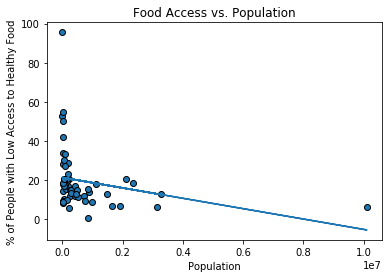

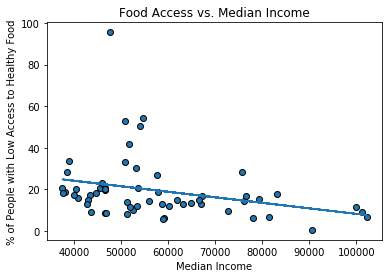

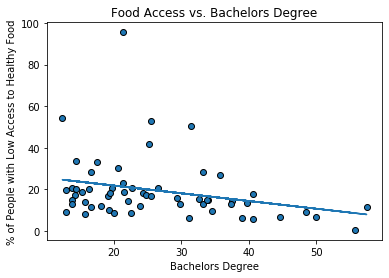

In [35]:
# Create function calculate correlation and create scatterplot for each dependent variable

def analyze(arg):
    
    # Calculate and print Pearson correlation coefficients for each variable
    print(f'The correlation coefficient between Low Food Access and Population is {pearsonr(df2["lowAccess"],df2["population"])[0]}.')
    print(f'The correlation coefficient between Low Food Access and Median Income is {pearsonr(df2["lowAccess"],df2["medInc"])[0]}.')
    print(f'The correlation coefficient between Low Food Access and Bachelors Degree Proportion is {pearsonr(df2["lowAccess"],df2["bachelors"])[0]}.')
    
    # Create scatterplot for each variable
    access = df2['lowAccess']
    
    variableDict = {
        'Population' : df2['population'],
        'Median Income' : df2['medInc'],
        'Bachelors Degree' : df2['bachelors']
    }
    
    for key,value in variableDict.items():
        # Save plot as figure to iterate through dictionary
        pyplot.figure()
       
        # Create scatterplot for each variable
        pyplot.scatter(value, access, edgecolors = 'black')
        pyplot.title(f'Food Access vs. {key}')
        pyplot.xlabel(key)
        pyplot.ylabel('% of People with Low Access to Healthy Food')
        pyplot
        
        pyplot.savefig(f'Resources/{key}.png')
        
        # Create regression line for each variable
        x_values = value
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, access)
        regress_values = x_values * slope + intercept
        pyplot.plot(x_values,regress_values)
    
analyze(state)

In [22]:
# Run final correlation analysis across all states
def totalAnalysis():
    
    for state in df['State']:
        avgPopAccessCorr = pearsonr(df["lowAccess"],df["population"])[0].mean()
        avgIncAccessCorr = pearsonr(df["lowAccess"],df["medInc"])[0].mean()
        avgEduAccessCorr = pearsonr(df["lowAccess"],df["bachelors"])[0].mean()
    
    print(f'The total average correlation between population and low food access is {avgPopAccessCorr}.')
    print(f'The total average correlation between median income and low food access is {avgIncAccessCorr}.')
    print(f'The total average correlation between education and low food access is {avgEduAccessCorr}.')
    
totalAnalysis()    

The total average correlation between population and low food access is -0.06669974029299236.
The total average correlation between median income and low food access is 0.032952389831000684.
The total average correlation between education and low food access is 0.0345972656510557.


In [25]:
# Run final multivariate regression across all states
import statsmodels.api as sm

x = df[['population','medInc','bachelors']]
y = df['lowAccess']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lowAccess   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.554
Method:                 Least Squares   F-statistic:                              1294.
Date:                Wed, 29 Jan 2020   Prob (F-statistic):                        0.00
Time:                        19:36:51   Log-Likelihood:                         -13816.
No. Observations:                3120   AIC:                                  2.764e+04
Df Residuals:                    3117   BIC:                                  2.766e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
population -7.348e-06   1.16e-06     -6.350      0.000   -9.62e-06   -5.08e-06
medInc         0.0005    2.5e-05     18.115      0.000       0.000       0.001
bachelors      0.0325      0.055      0.587      0.557      -0.076       0.141
==============================================================================
Omnibus:                     1337.248   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6188.737
Skew:                           2.064   Prob(JB):                         0.00
Kurtosis:                       8.528   Cond. No.                     5.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

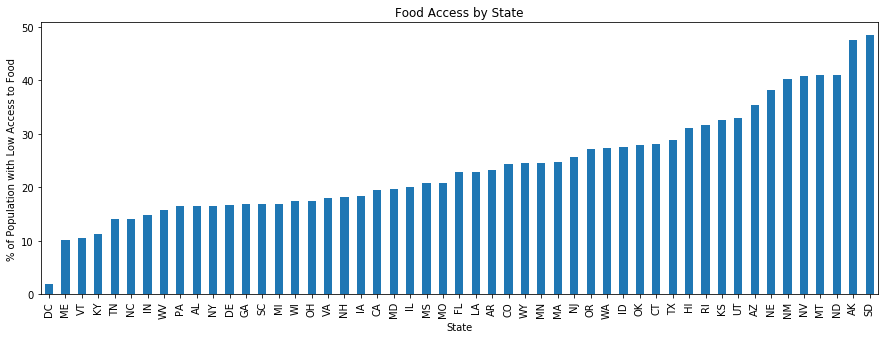

In [64]:
# Food Access Across States Plot

df3 = df.groupby('State').mean()['lowAccess']
df3 = df3.sort_values()

fig = df3.plot.bar(figsize = (15,5))
fig.set_xlabel('State')
fig.set_ylabel('% of Population with Low Access to Food')
fig.set_title('Food Access by State')
graph = fig.get_figure()
graph.savefig('Resources/FoodAccessAcrossStates.png')